- Mengunduh Dataset

In [1]:
!gdown --id 1Uj5ddrht_AdhPXRMhMUaNkzxAsLnz4dN

/opt/venv/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Uj5ddrht_AdhPXRMhMUaNkzxAsLnz4dN
To: /home/malifnasrulloh/Documents/uas-big-data/hotels.csv
100%|██████████████████████████████████████| 16.9M/16.9M [00:03<00:00, 4.78MB/s]


# Import Library

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# set konfigurasi pada library `pandas` agar dapat menampilkan semua kolom
pd.set_option("display.max_columns", None)

# Tahap 1: Pengenalan Dataset

## Load dataset

- Dataset dimuat ke dalam dataframe `pandas`.
- Menampilkan 5 sampel data secara acak menggunakan `sample()` untuk memeriksa isi dataset.

In [3]:
data = pd.read_csv("hotels.csv")
data.sample(5, random_state=42)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


Menampilkan jumlah baris dan kolom dalam dataset untuk memahami dimensi data.

In [4]:
print(
    f"""
Total Data  : {len(data)} data
Total Kolom : {len(data.columns)} kolom
"""
)


Total Data  : 119390 data
Total Kolom : 32 kolom



- Menghitung jumlah nilai kosong (`null`) di setiap kolom menggunakan `isna().sum()`.
- Memeriksa tipe data pada setiap kolom menggunakan `dtypes`.

In [5]:
pd.DataFrame({"Null-Values Count": data.isna().sum(), "DTypes": data.dtypes})

,Null-Values Count,DTypes
hotel,0,object
is_canceled,0,int64
lead_time,0,int64
arrival_date_year,0,int64
arrival_date_month,0,object
arrival_date_week_number,0,int64
arrival_date_day_of_month,0,int64
stays_in_weekend_nights,0,int64
stays_in_week_nights,0,int64
adults,0,int64


Dari hasil diatas didapatkan
- Ada beberapa kolom yang tidak tepat memiliki tipe data yang tepat
- Sejumlah kolom memiliki `null-value` yang besar

Untuk mengatasi hal tersebut akan ditunjukkan pada tahap selanjutnya

---

# Tahap 2: Pembersihan Data

## Mengubah Tipe Data ke `datetime`

Kolom yang berisi informasi tanggal diubah menjadi tipe data `datetime` untuk memudahkan analisis waktu
- **`arrival_date_month`**: Diubah dari nama bulan menjadi angka bulan (1–12).

In [6]:
data.arrival_date_month = pd.to_datetime(data.arrival_date_month, format="%B").dt.month
data.sample(5, random_state=42)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,12,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,7,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,12,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,3,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,4,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


- **`reservation_status_date`**: Diubah menjadi format `datetime`.

In [7]:
data["reservation_status_date"] = pd.to_datetime(data.reservation_status_date)
data.sample(5, random_state=42)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,12,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,7,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,12,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,3,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,4,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


Pada bagian ini kami membuat kolom/fitur baru `arrival_date` sebagai gabungan dari hari, bulan, dan tahun kedatangan customer.<br>
Fitur ini didapatkan dari kolom `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`, yang mana akan dihapus setelah pembentukan fitur.

In [8]:
data["arrival_date"] = pd.to_datetime(
    {
        "day": data.arrival_date_day_of_month,
        "month": data.arrival_date_month,
        "year": data.arrival_date_year,
    }
)
data = data.drop(
    columns=[
        "arrival_date_year",
        "arrival_date_month",
        "arrival_date_week_number",
        "arrival_date_day_of_month",
    ]
)

data.sample(5, random_state=42)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
30946,Resort Hotel,0,203,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09,2016-12-02
40207,City Hotel,1,82,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16,2015-07-16
103708,City Hotel,0,25,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30,2016-12-27
85144,City Hotel,0,1,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10,2016-03-09
109991,City Hotel,0,70,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20,2017-04-16


## Encoding Data Kategorikal

- **Room Type Encoding**: Kolom `assigned_room_type` dan `reserved_room_type` diubah menjadi angka menggunakan dictionary encoder

In [9]:
# Ambil setiap alphabet dan beri index pada setiap huruf
room_type_decoder = dict(enumerate(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")))

# Ubah posisi yang awalnya {2:C} menjadi {C:2}
room_type_encoder = {v: k for k, v in room_type_decoder.items()}

# Terapkan pada kolom
data.assigned_room_type = data.assigned_room_type.replace(room_type_encoder)
data.reserved_room_type = data.reserved_room_type.replace(room_type_encoder)

data.sample(5, random_state=42)

/tmp/ipykernel_3279084/4000298244.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.assigned_room_type = data.assigned_room_type.replace(room_type_encoder)
/tmp/ipykernel_3279084/4000298244.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.reserved_room_type = data.reserved_room_type.replace(room_type_encoder)


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
30946,Resort Hotel,0,203,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,5,5,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09,2016-12-02
40207,City Hotel,1,82,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,0,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16,2015-07-16
103708,City Hotel,0,25,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,0,10,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30,2016-12-27
85144,City Hotel,0,1,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,0,0,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10,2016-03-09
109991,City Hotel,0,70,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,0,0,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20,2017-04-16


- **Label Encoding untuk Kolom Objektif**: Menggunakan `LabelEncoder` untuk mengonversi kolom kategorikal menjadi angka

Dapatkan kolom apa saja yang memiliki `data-type` `object`

In [10]:
have_object_dtype = data.select_dtypes("object").columns
have_object_dtype

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

Buat `LabelEncoder` untuk setiap kolom yang akan di *encode*

In [11]:
# inisiasi LabelEncoder unruk setiap kolom menggunakan dictionary
label_encoder = {i: LabelEncoder() for i in have_object_dtype}

# buat decoder (mengubah angka menjadi label-nya) untuk kebutuhan dimasa mendatang
label_decoder = {i: {} for i in have_object_dtype}

# encode setiap kolom kategorikal
for i in have_object_dtype:
    data[i] = label_encoder[i].fit_transform(data[i])

    temp = dict(enumerate(label_encoder[i].classes_))
    label_decoder[i] = temp

    # tampilkan detail label dari setiap kolom
    print(f"{i} : {temp}")

hotel : {0: 'City Hotel', 1: 'Resort Hotel'}
meal : {0: 'BB', 1: 'FB', 2: 'HB', 3: 'SC', 4: 'Undefined'}
country : {0: 'ABW', 1: 'AGO', 2: 'AIA', 3: 'ALB', 4: 'AND', 5: 'ARE', 6: 'ARG', 7: 'ARM', 8: 'ASM', 9: 'ATA', 10: 'ATF', 11: 'AUS', 12: 'AUT', 13: 'AZE', 14: 'BDI', 15: 'BEL', 16: 'BEN', 17: 'BFA', 18: 'BGD', 19: 'BGR', 20: 'BHR', 21: 'BHS', 22: 'BIH', 23: 'BLR', 24: 'BOL', 25: 'BRA', 26: 'BRB', 27: 'BWA', 28: 'CAF', 29: 'CHE', 30: 'CHL', 31: 'CHN', 32: 'CIV', 33: 'CMR', 34: 'CN', 35: 'COL', 36: 'COM', 37: 'CPV', 38: 'CRI', 39: 'CUB', 40: 'CYM', 41: 'CYP', 42: 'CZE', 43: 'DEU', 44: 'DJI', 45: 'DMA', 46: 'DNK', 47: 'DOM', 48: 'DZA', 49: 'ECU', 50: 'EGY', 51: 'ESP', 52: 'EST', 53: 'ETH', 54: 'FIN', 55: 'FJI', 56: 'FRA', 57: 'FRO', 58: 'GAB', 59: 'GBR', 60: 'GEO', 61: 'GGY', 62: 'GHA', 63: 'GIB', 64: 'GLP', 65: 'GNB', 66: 'GRC', 67: 'GTM', 68: 'GUY', 69: 'HKG', 70: 'HND', 71: 'HRV', 72: 'HUN', 73: 'IDN', 74: 'IMN', 75: 'IND', 76: 'IRL', 77: 'IRN', 78: 'IRQ', 79: 'ISL', 80: 'ISR', 81: 

Pada saat *encode* label diatas, didapatkan kolom `country` memiliki data `nan` dengan value 177. Untuk mengatasinya ada pada tahap selanjutnya.

## Mengatasi NULL Value

Karena value 177 pada kolom `country` adalah `nan`, maka sementara akan di *replace* terlebih dahulu ke bentuk `nan`.

In [12]:
# ganti data nan
data["country"] = data["country"].replace({177: np.nan})

Berikutnya akan ditampilkan kolom apa saja yang memiliki nilai `nan`.

In [13]:
data.isna().sum()[data.isna().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

- Isi nilai `nan` pada kolom `country` dengan nilai rata-rata nya dan ubah tipenya menjadi `int`.

In [14]:
data.loc[:, "country"] = data["country"].fillna(data["country"].mean()).astype(int)

- Untuk kolom `company` yang awalnya berisi ID dari company yang melakukan reservasi, akan diubah isinya menjadi apakah seseorang itu berasal dari perusahaan atau tidak. Data tersebut akan membantu dalam analisis berikutnya.
- Untuk kolom `children` dan `agent`, `null-value` akan diisi ke nilai rata-rata nya.

In [ ]:
# pilih data yang tidak memiliki value company nan untuk diberi nilai 1
data.loc[data.company.isna() == False, "company"] = 1

# pilih data yang memiliki value company nan untuk diberi nilai 0
data.loc[data.company.isna() == True, "company"] = 0

# isi null value dengan nilai rata rata
data.loc[:, "children"] = data["children"].fillna(data["children"].mean()).astype(int)
data.loc[:, "agent"] = data["agent"].fillna(data["agent"].mean()).astype(int)

data.sample(5, random_state=42)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
30946,1,0,203,2,5,2,0.0,0,0,59.0,3,1,0,0,0,5,5,4,0,250.0,0.0,0,2,66.8,0,0,1,2016-12-09,2016-12-02
40207,0,1,82,0,3,2,0.0,0,0,135.0,6,3,0,0,0,0,0,0,0,9.0,0.0,0,2,76.5,0,0,0,2015-07-16,2015-07-16
103708,0,0,25,0,3,3,0.0,0,0,25.0,5,3,0,0,0,0,10,2,0,220.0,0.0,0,3,60.0,0,1,1,2016-12-30,2016-12-27
85144,0,0,1,0,1,1,0.0,0,0,154.0,6,3,0,0,0,0,0,0,0,9.0,0.0,0,3,95.0,0,0,1,2016-03-10,2016-03-09
109991,0,0,70,2,2,2,0.0,0,3,59.0,6,3,0,0,0,0,0,0,0,9.0,0.0,0,2,108.0,0,0,1,2017-04-20,2017-04-16


Tampilkan hasil akhir dari tahap pembersihan data

In [16]:
pd.DataFrame({"Null-Values Count": data.isna().sum(), "DTypes": data.dtypes})

,Null-Values Count,DTypes
hotel,0,int64
is_canceled,0,int64
lead_time,0,int64
stays_in_weekend_nights,0,int64
stays_in_week_nights,0,int64
adults,0,int64
children,0,float64
babies,0,int64
meal,0,int64
country,0,float64


- Didapatkan semua kolom memiliki tipe data `numeric` dan tidak ada null value yang tersisa.

In [17]:
# tampilkan ringkasan dari setiap kolom pada dataset

data.describe()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390
mean,0.335539,0.370416,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.555742,92.986029,4.928101,2.585317,0.031912,0.087118,0.137097,0.990259,1.332147,0.221124,0.124893,86.598484,0.056931,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803,2016-07-30 00:24:47.883407104,2016-08-28 16:39:45.727447808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00
25%,0.000000,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,56.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,2016-02-01 00:00:00,2016-03-13 00:00:00
50%,0.000000,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,81.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000,2016-08-07 00:00:00,2016-09-06 00:00:00
75%,1.000000,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,152.000000,0.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,2017-02-08 00:00:00,2017-03-18 00:00:00
max,1.000000,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,4.000000,176.000000,7.000000,4.000000,1.000000,26.000000,72.000000,15.000000,15.000000,21.000000,2.000000,535.000000,1.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,2017-09-14 00:00:00,2017-08-31 00:00:00
std,0.472181,0.482918,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,1.068598,44.584972,1.266726,0.907578,0.175767,0.844336,1.497437,1.701944,1.891418,0.652306,0.334678,102.915522,0.231712,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776,NaN,NaN


---

# Tahap 3: Eksplorasi Awal

## Tren Pemesanan

Akan ditampilkan grafik yang menunjukkan jumlah pemesanan berdasarkan bulan dan tahun.

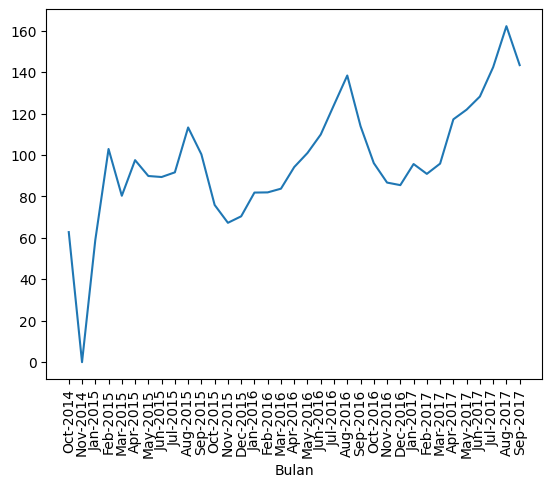

In [18]:
reservation_count_by_month = data.groupby(
    [data.reservation_status_date.dt.year, data.reservation_status_date.dt.month]
)["adr"].mean()
reservation_count_by_month.index = map(
    lambda x: f"{calendar.month_abbr[x[1]]}-{x[0]}", reservation_count_by_month.index
)

sns.lineplot(x=reservation_count_by_month.index, y=reservation_count_by_month.values)
plt.xlabel("Bulan")
plt.xticks(rotation=90)

plt.show()

In [19]:
reservation_count_by_month.sort_values(ascending=False).head()

Aug-2017    162.217112
Sep-2017    143.411170
Jul-2017    142.419411
Aug-2016    138.397444
Jun-2017    128.254714
Name: adr, dtype: float64

In [20]:
reservation_count_by_month.diff(periods=6).sort_values(ascending=False).head()

Jun-2015    89.392027
Aug-2017    71.308415
Aug-2016    56.425747
Sep-2017    47.552240
Jul-2017    46.761405
Name: adr, dtype: float64

**Dari eksplorasi diatas didapatkan jika jumlah reservasi selalu meningkat pada pertengahan tahun disetiap tahunnya.**

## Distribusi Tipe Pelanggan

Pada eksplorasi ini proporsi pelanggan bisnis vs non-bisnis akan ditampilkan.

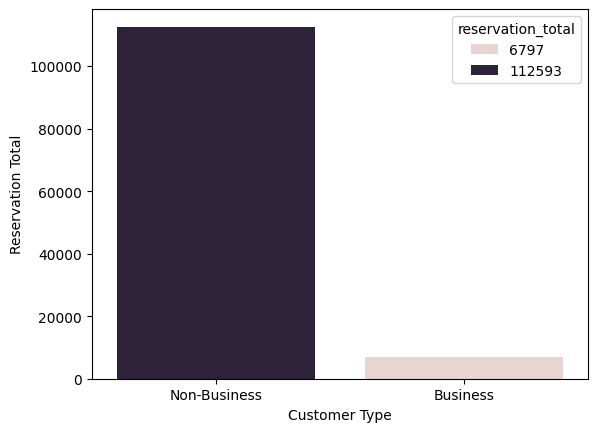

In [21]:
# Kelompokkan data berdasarkan tipe `company`
distribute_customer_type = (
    data.groupby([data.company])["company"]
    .count()
    .rename({0: "Non-Business", 1: "Business"})
    .to_frame()
    .rename(columns={"company": "reservation_total"})
)

# plot untuk proporsi tipe pelanggan
sns.barplot(
    distribute_customer_type,
    x=distribute_customer_type.index,
    y="reservation_total",
    hue="reservation_total",
)

plt.xlabel("Customer Type")
plt.ylabel("Reservation Total")

plt.show()

**Pada eksplorasi diatas didapatkan kebanyakan yang melakukan reservasi adalan orang non-bisnis.**

## Pembatalan Reservasi

Pada tahap awal akan ditampilkan tingkat pembatalan secara keseluruhan.

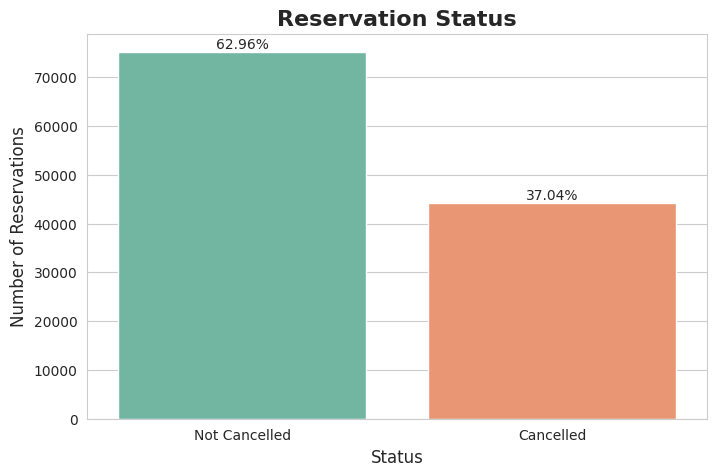

In [22]:
# ambil total data pembatalan reservasi
cancelled_perc = data["is_canceled"].value_counts(normalize=True)
cancelled_counts = data["is_canceled"].value_counts()
labels = ["Not Cancelled", "Cancelled"]

# plot kan hasil data
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    x=labels,
    y=cancelled_counts.values,
    hue=labels,
    palette="Set2",
)

plt.title("Reservation Status", fontsize=16, weight="bold")
plt.ylabel("Number of Reservations", fontsize=12)
plt.xlabel("Status", fontsize=12)

for i, count in enumerate(cancelled_counts):
    percentage = f"{cancelled_perc[i] * 100:.2f}%"
    plt.text(
        i, count + max(cancelled_counts) * 0.01, percentage, ha="center", fontsize=10
    )

plt.show()

Berikut akan ditampilkan variabel dengan korelasi tertinggi terhadap pembatalan reservasi.

In [23]:
most_correlation_with_is_canceled = data.corr()["is_canceled"].sort_values(
    ascending=False
)
most_correlation_with_is_canceled.iloc[1:][most_correlation_with_is_canceled > 0.09]

# variabel yang paling berpengaruh pada pembatalan reservasi

deposit_type              0.468634
lead_time                 0.293123
country                   0.269887
distribution_channel      0.167600
previous_cancellations    0.110133
Name: is_canceled, dtype: float64

# Tahap 4: Analisis Spesifik

## Pembatalan Reservasi

### Korelasi dengan Tipe Deposit

In [ ]:
data.groupby("deposit_type").is_canceled.value_counts().reset_index().replace(
    {
        "deposit_type": label_decoder["deposit_type"],
        "is_canceled": {0: "Not Canceled", 1: "Canceled"},
    }
)

,deposit_type,is_canceled,count
0,No Deposit,Not Canceled,74947
1,No Deposit,Canceled,29694
2,Non Refund,Canceled,14494
3,Non Refund,Not Canceled,93
4,Refundable,Not Canceled,126
5,Refundable,Canceled,36


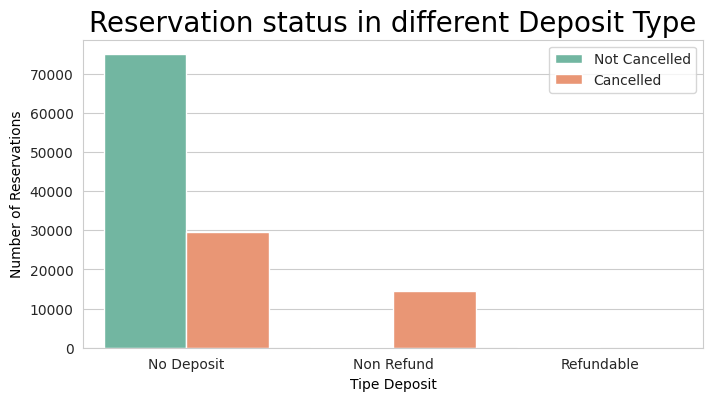

In [25]:
plt.figure(figsize=(8, 4))

ax1 = sns.countplot(x="deposit_type", hue="is_canceled", data=data, palette="Set2")

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title("Reservation status in different Deposit Type", size=20, color="Black")
plt.xlabel("Tipe Deposit", color="Black")
plt.ylabel("Number of Reservations", color="Black")

plt.legend(["Not Cancelled", "Cancelled"])

deposit_type_label = label_decoder["deposit_type"].values()
ax1.set_xticks(range(len(deposit_type_label)), deposit_type_label)

plt.show()

**Dari hasil diatas didapatkan pembayaran dengan `No Deposit` memiliki tingkat pembatalan reservasi yang tinggi**

### Korelasi dengan Lead Time

**Lead time adalah perbedaan hari antara tanggal pemesanan dengan tanggal yang dijadwalkan untuk customer untuk tiba di hotel**

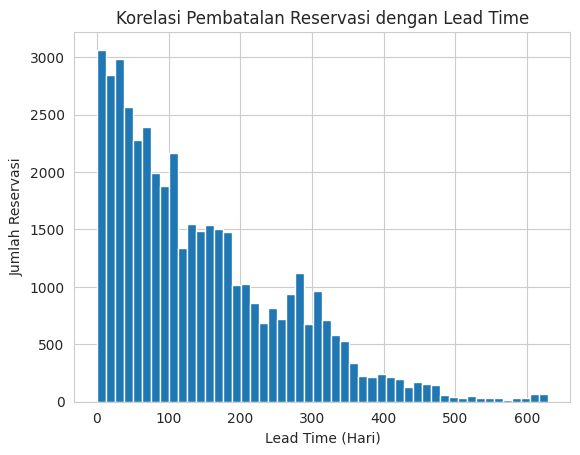

In [26]:
data[data["is_canceled"] == 1]["lead_time"].hist(bins=50)
plt.xlabel("Lead Time (Hari)")
plt.ylabel("Jumlah Reservasi")

plt.title("Korelasi Pembatalan Reservasi dengan Lead Time")

plt.show()

**Didapatkan customer dengan lead time yang terbatas/sedikit akan lebih memilih untuk melakukan pembatalan reservasi.**

### Korelasi dengan Negara

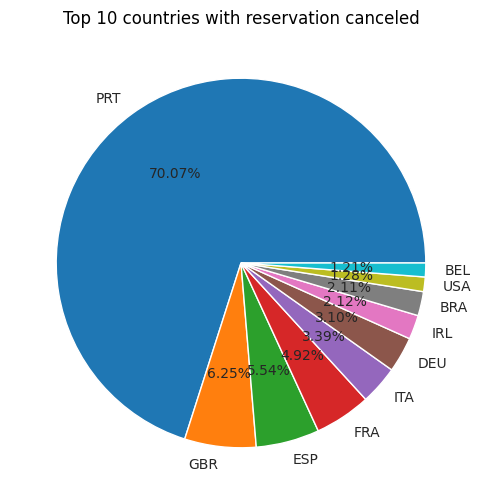

In [27]:
cancelled_data = data[data["is_canceled"] == 1]
top_10_country = cancelled_data["country"].value_counts().head(10)

original_names = top_10_country.index.map(label_decoder["country"])

plt.figure(figsize=(6, 6))
plt.title("Top 10 countries with reservation canceled", color="black")
plt.pie(top_10_country, autopct="%.2f%%", labels=original_names)
plt.show()

**Didapatkan customer yang berasal dari Portugal (PRT) memiliki tingkat pembatalan reservasi yang tinggi**.

### Korelasi dengan `distribution_channel`

Distribution channel merujuk pada cara atau saluran di mana pemesanan (booking) dilakukan untuk layanan seperti akomodasi, tur, atau perjalanan. Dalam konteks ini, dua istilah yang disebutkan, yaitu "TA" dan "TO", memiliki arti "Travel Agents" dan "Tour Operator"

In [28]:
data.groupby("distribution_channel").is_canceled.value_counts().reset_index().replace(
    {
        "distribution_channel": label_decoder["distribution_channel"],
        "is_canceled": {0: "Not Canceled", 1: "Canceled"},
    }
)

,distribution_channel,is_canceled,count
0,Corporate,Not Canceled,5203
1,Corporate,Canceled,1474
2,Direct,Not Canceled,12088
3,Direct,Canceled,2557
4,GDS,Not Canceled,156
5,GDS,Canceled,37
6,TA/TO,Not Canceled,57718
7,TA/TO,Canceled,40152
8,Undefined,Canceled,4
9,Undefined,Not Canceled,1


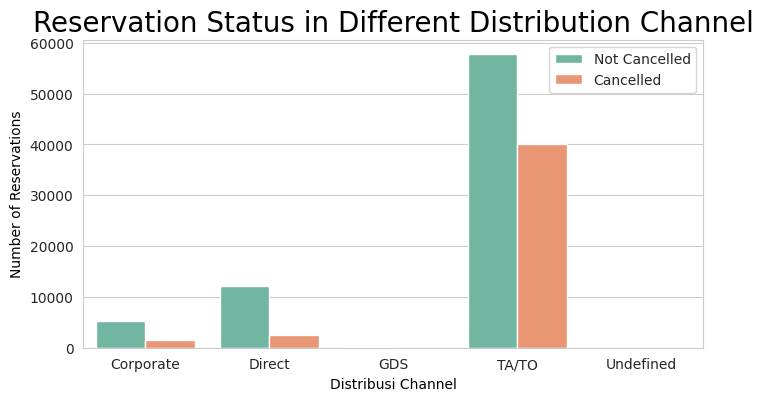

In [29]:
plt.figure(figsize=(8, 4))

ax1 = sns.countplot(
    x="distribution_channel", hue="is_canceled", data=data, palette="Set2"
)

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title(
    "Reservation Status in Different Distribution Channel", size=20, color="Black"
)
plt.xlabel("Distribusi Channel", color="Black")
plt.ylabel("Number of Reservations", color="Black")

plt.legend(["Not Cancelled", "Cancelled"])

distribution_channel_label = label_encoder["distribution_channel"].classes_
ax1.set_xticks(range(len(distribution_channel_label)), distribution_channel_label)

plt.show()

**Didapatkan customer yang memakai TA/TO (Travel Agents/Tour Operator) memiliki tingkat pembatalan reservasi yang paling tinggi dibandingkan dengan tipe distributor lainnya.**

### Korelasi dengan `previous_cancellations`

Previous cancellations merujuk pada jumlah pemesanan (booking) yang telah dibatalkan oleh pelanggan sebelum pemesanan yang sedang berlangsung (current booking) dilakukan.

<Axes: xlabel='previous_cancellations', ylabel='count'>

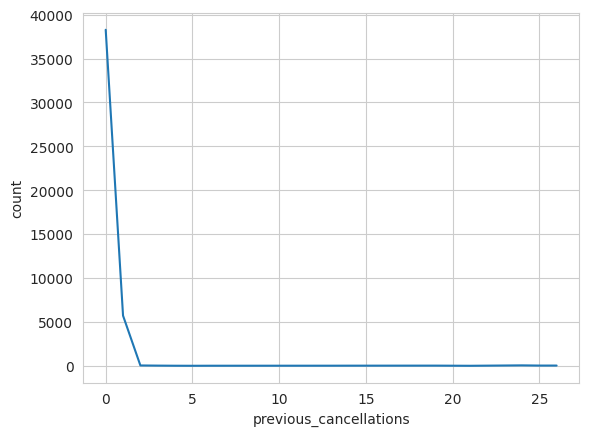

In [30]:
correlate_previous_cancellations = (
    cancelled_data["previous_cancellations"].value_counts().reset_index()
)
sns.lineplot(correlate_previous_cancellations, x="previous_cancellations", y="count")

In [31]:
correlate_previous_cancellations

,previous_cancellations,count
0,0,38282
1,1,5714
2,24,48
3,2,38
4,26,26
5,25,25
6,3,20
7,19,19
8,14,14
9,13,11


**Didapatkan customer yang membatalkan reservasinya langsung (fix) tidak memiliki riwayat pembatalan sebelumnya**

## Durasi Menginap

Durasi menginap rata-rata:
market_segment
Aviation         3.607595
Complementary    1.647376
Corporate        2.092918
Direct           3.205775
Groups           2.992529
Offline TA/TO    3.903877
Online TA        3.573986
Undefined        1.500000
Name: stay_duration, dtype: float64


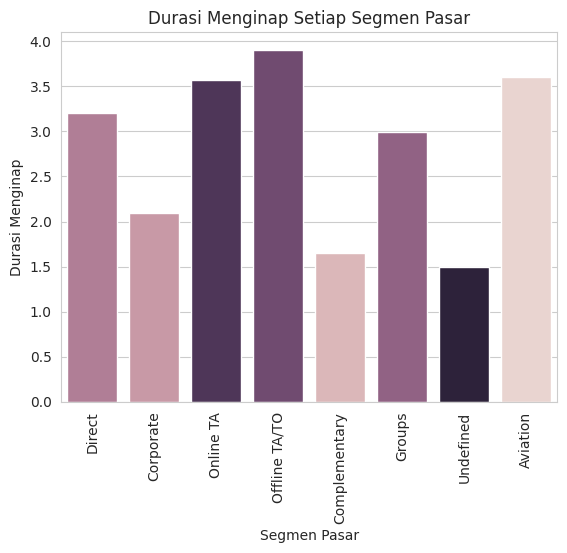

In [32]:
# Analisis Durasi Menginap
# Perbedaan durasi menginap antara pelanggan bisnis dan liburan
data["stay_duration"] = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]
business_vs_leisure = data.groupby("market_segment")["stay_duration"].mean()
business_vs_leisure.index = business_vs_leisure.index.map(
    label_decoder["market_segment"]
)
print("Durasi menginap rata-rata:")
print(business_vs_leisure)

# Visualisasi bar plot untuk durasi menginap
sns.barplot(
    data=data,
    x=data["market_segment"].replace(label_decoder["market_segment"]),
    y="stay_duration",
    errorbar=None,
    hue=data["market_segment"],
    legend=False,
)
plt.title("Durasi Menginap Setiap Segmen Pasar")
plt.xticks(rotation=90)
plt.xlabel("Segmen Pasar")
plt.ylabel("Durasi Menginap")

plt.show()

**Didapatkan `Offline TA/TO` adalah segment pasar dengan rata-rata durasi menginap paling lama di hotel.**

## Segmentasi Pelanggan

### Segmentasi Pelanggan Berdasarkan Asal Geografis

Jumlah reservasi (non-canceled) pada setiap negara

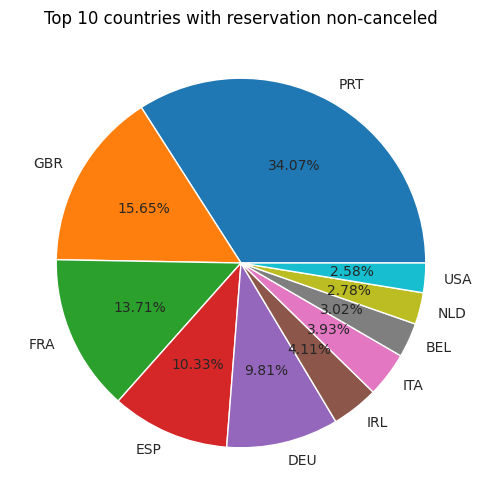

In [33]:
non_cancelled_data = data[data["is_canceled"] == 0]
top_10_country = non_cancelled_data["country"].value_counts().head(10)

top_10_country.index = top_10_country.index.map(label_decoder["country"])

plt.figure(figsize=(6, 6))
plt.title("Top 10 countries with reservation non-canceled", color="black")
plt.pie(top_10_country, autopct="%.2f%%", labels=top_10_country.index)
plt.show()

In [34]:
top_10_country

country
PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: count, dtype: int64

**Portugal mendapatkan total pelanggan terbanyak pada reservasi hotel (non-canceled)**

### Segmentasi Pelanggan Berdasarkan Tipe Kamar yang Dipesan

                           adr  total_reservation
reserved_room_type                               
A                    89.156889              52364
B                    87.425000                750
C                   153.020609                624
D                   116.371997              13099
E                   119.067942               4621
F                   159.242142               2017
G                   169.237483               1331
H                   180.870112                356
L                   151.000000                  4


Text(0, 0.5, 'Rata-Rata Harga per Malam')

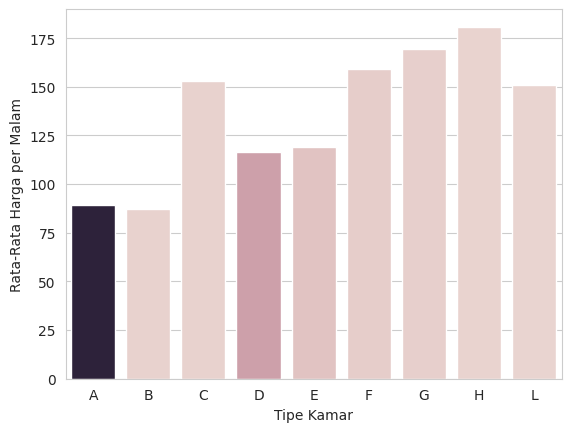

In [35]:
customer_segment_by_room_type = non_cancelled_data.groupby("reserved_room_type").agg({
    "adr":"mean",
    "reserved_room_type":"count"
    }).rename(columns={"reserved_room_type":"total_reservation"})

customer_segment_by_room_type.index = customer_segment_by_room_type.index.map(room_type_decoder)
print(customer_segment_by_room_type)

sns.barplot(
    customer_segment_by_room_type,
    x=customer_segment_by_room_type.index,
    y="adr",
    errorbar=None,
    hue="total_reservation",
    legend=False,
)
plt.xlabel("Tipe Kamar")
plt.ylabel("Rata-Rata Harga per Malam")

**Kamar tipe A menjadi incaran para customer yang mana juga memiliki harga yang relatif murah**